In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("breast-cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df['Unnamed: 32'].unique()

array([nan])

In [7]:
df = df.drop(['id' , 'Unnamed: 32'] , axis = 1)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [10]:
len(df)

569

In [11]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
df['diagnosis'] = df['diagnosis'].map({'B' : 0 , 'M' : 1}).astype(int)

In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [15]:
a = df.columns


In [16]:
len(a)

31

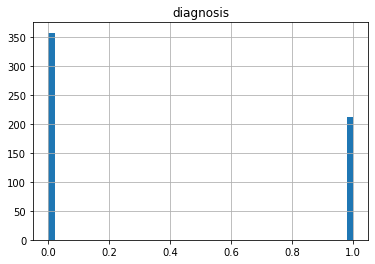

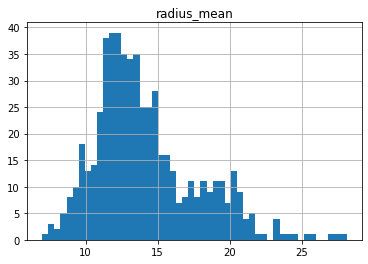

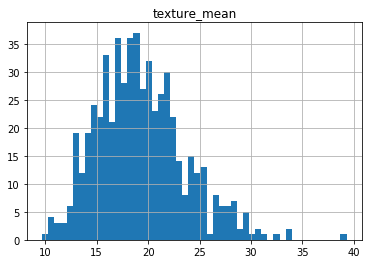

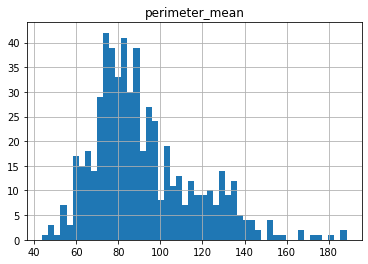

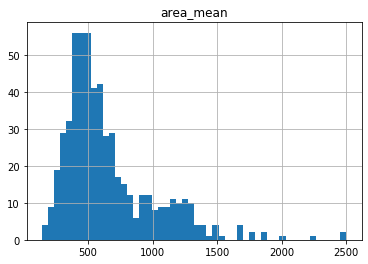

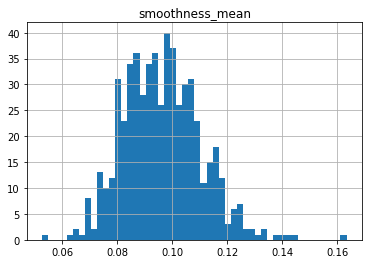

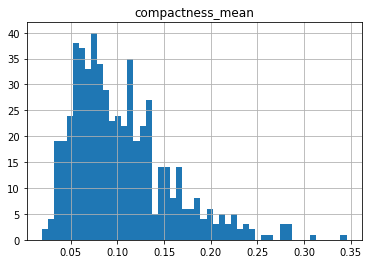

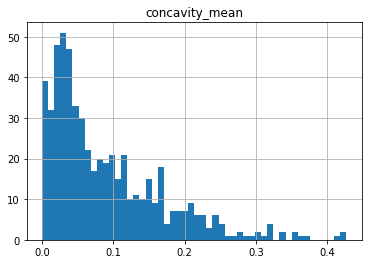

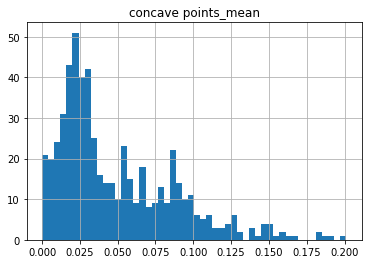

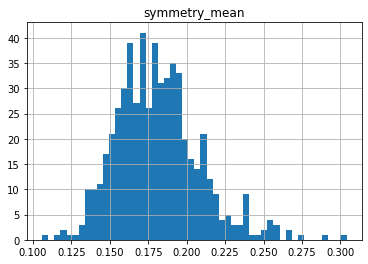

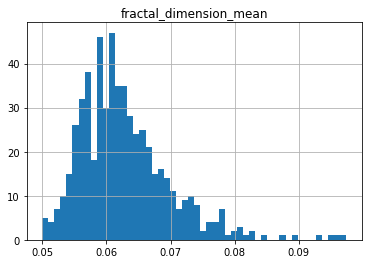

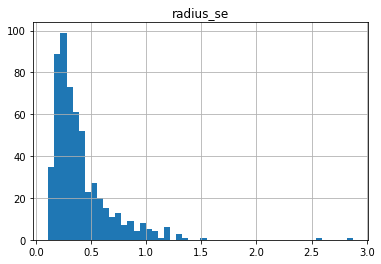

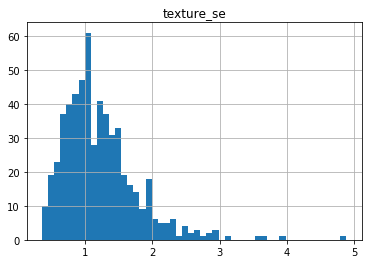

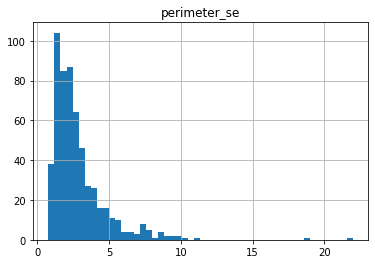

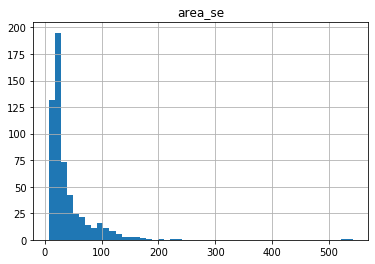

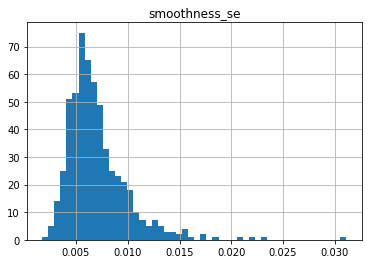

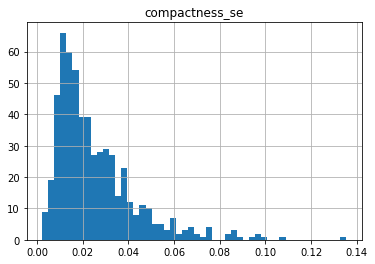

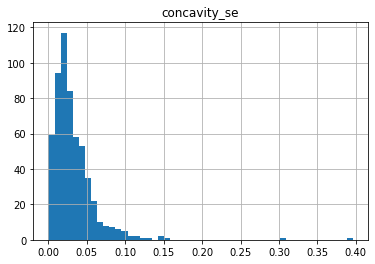

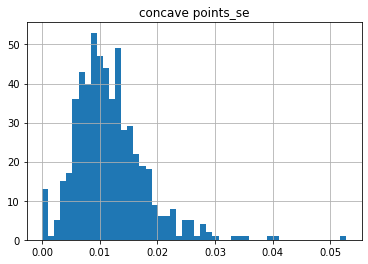

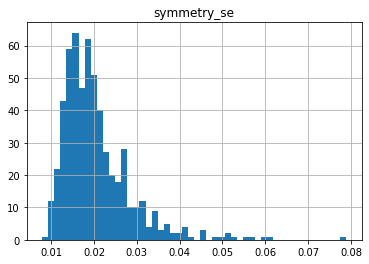

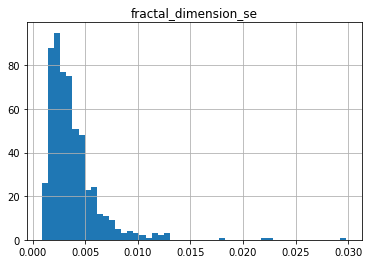

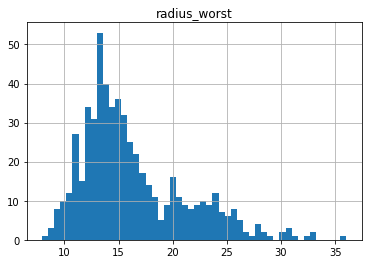

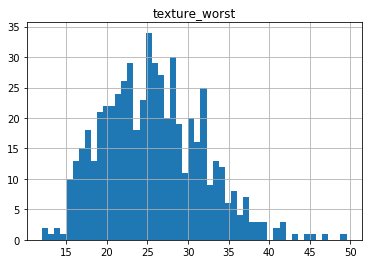

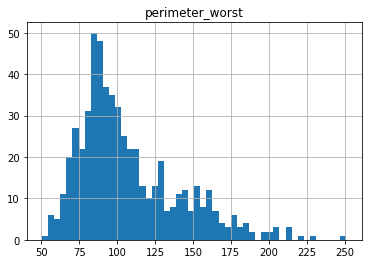

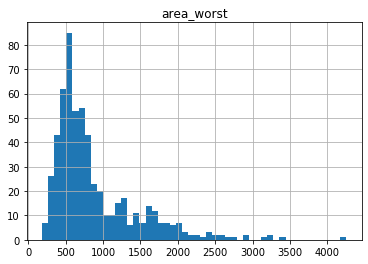

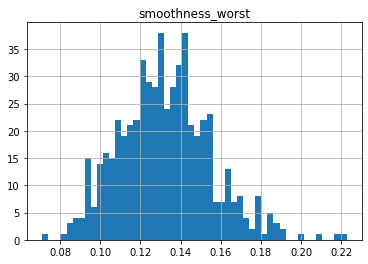

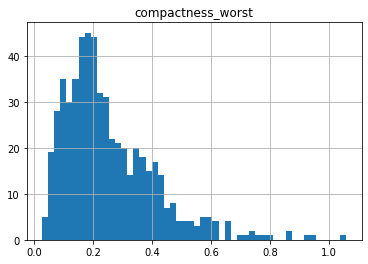

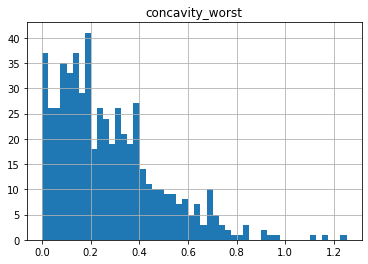

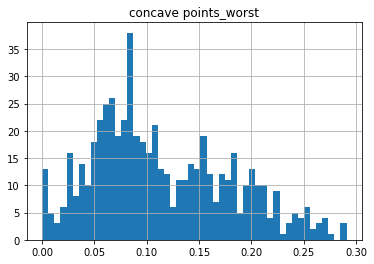

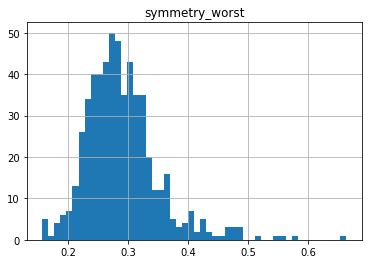

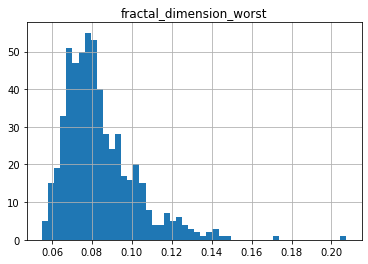

In [17]:
for i in a:
    df.hist(i , bins = 50)
    plt.show()

In [18]:
import warnings
warnings.filterwarnings('ignore')

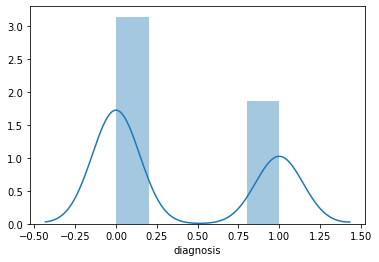

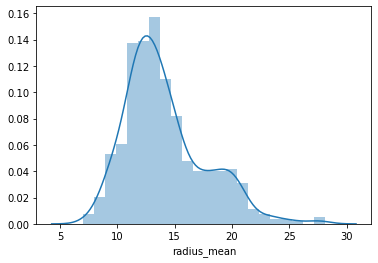

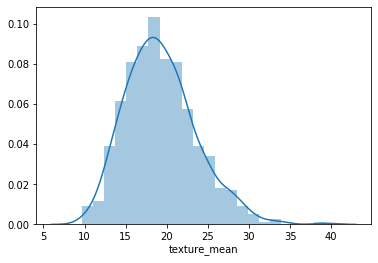

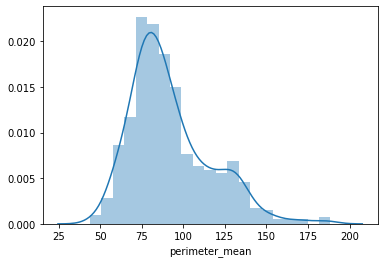

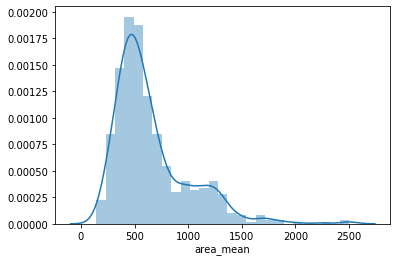

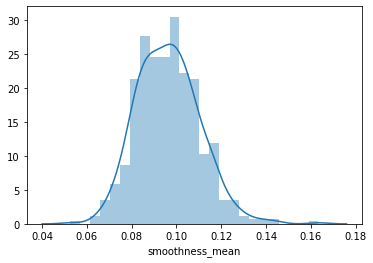

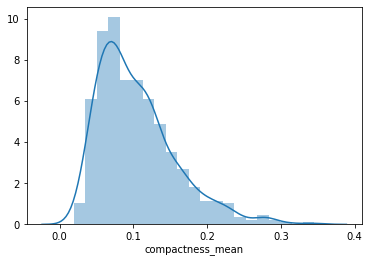

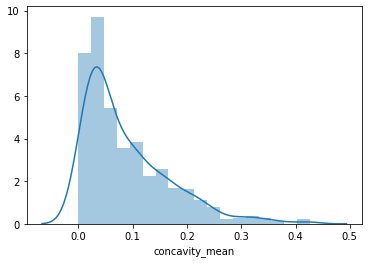

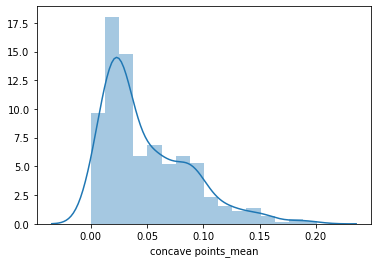

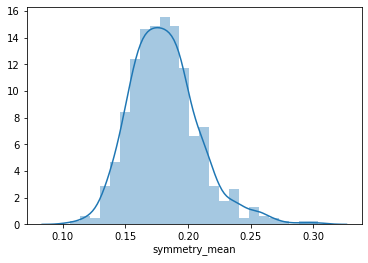

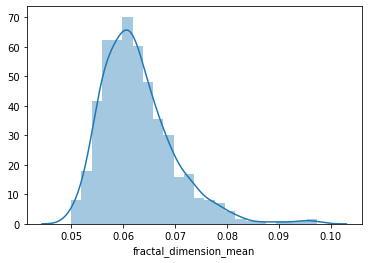

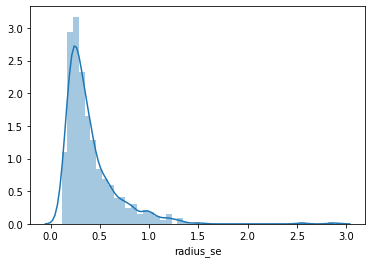

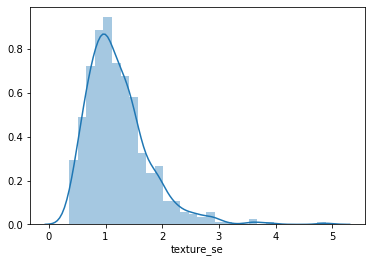

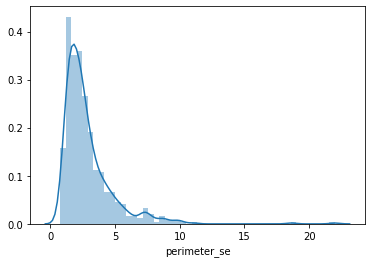

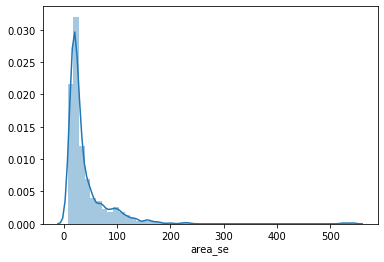

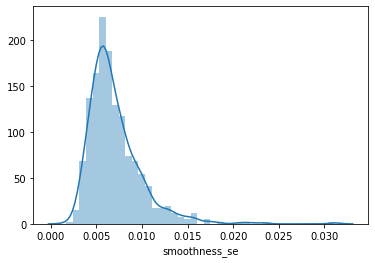

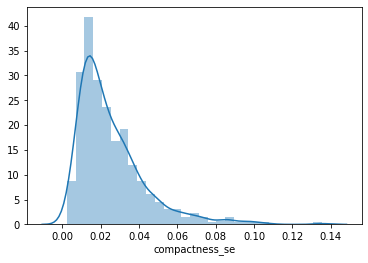

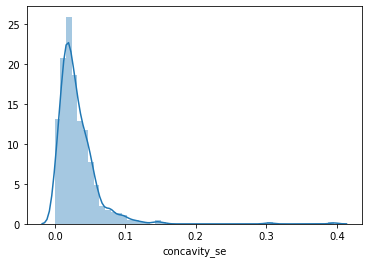

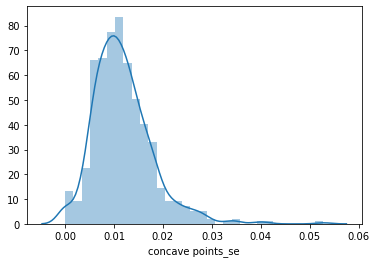

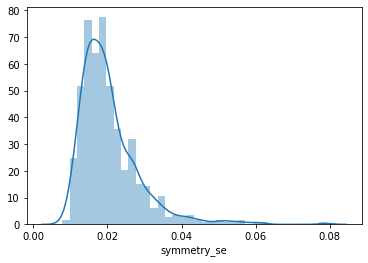

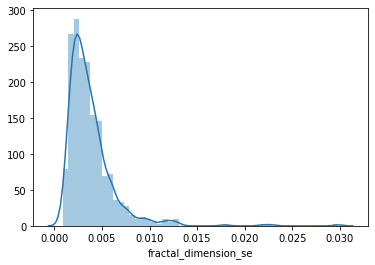

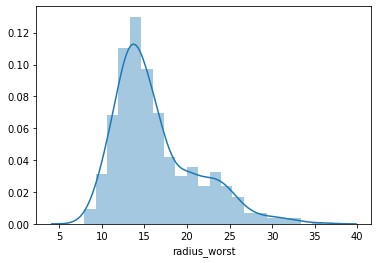

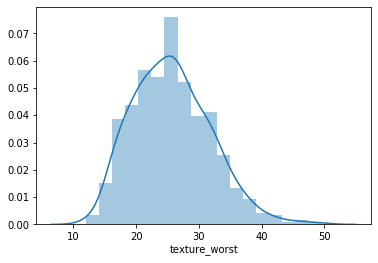

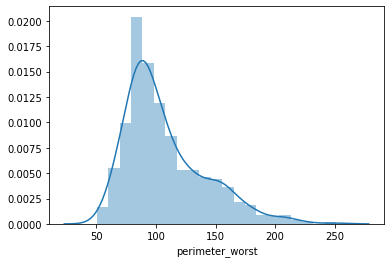

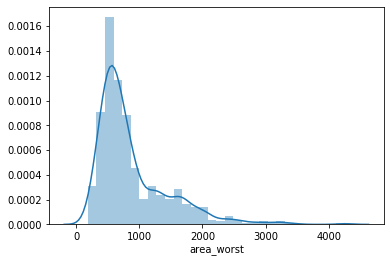

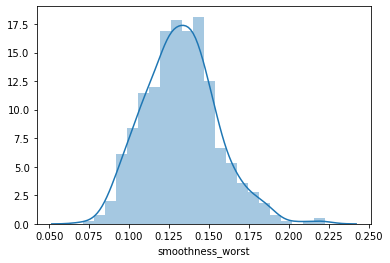

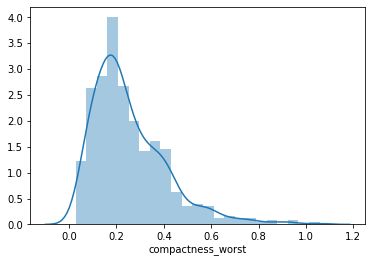

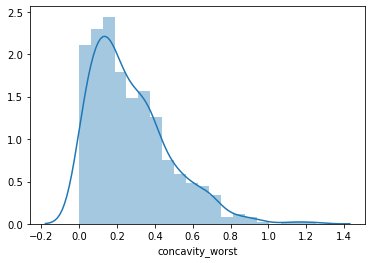

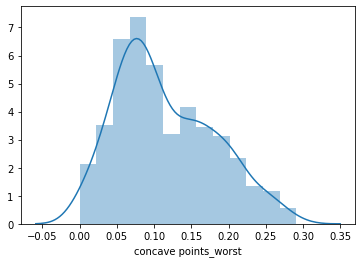

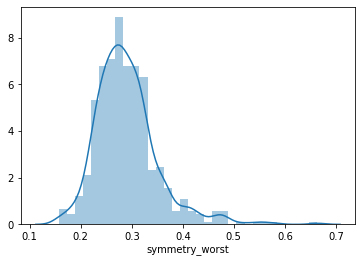

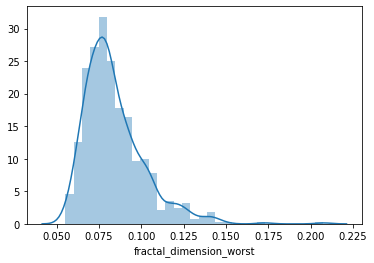

In [19]:
for i in a:
    sns.distplot(a = df[i])
    plt.show()

In [20]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
X = df.iloc[: , 1:]
y = df.iloc[: , 0]


In [22]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
172,15.460,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.07069,...,18.790,17.04,125.00,1102.0,0.15310,0.35830,0.58300,0.18270,0.3216,0.10100
407,12.850,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,14.400,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151
56,19.210,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,...,26.140,28.14,170.10,2145.0,0.16240,0.35110,0.38790,0.20910,0.3537,0.08294
497,12.470,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,14.060,24.34,92.82,607.3,0.12760,0.25060,0.20280,0.10530,0.3035,0.07661
301,12.460,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,0.06249,...,13.460,23.07,88.13,551.3,0.10500,0.21580,0.19040,0.07625,0.2685,0.07764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [27]:
X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


In [28]:
y_train.head()

172    1
407    0
56     1
497    0
301    0
Name: diagnosis, dtype: int32

In [29]:
y_test.head()

204    0
70     1
131    1
431    0
540    0
Name: diagnosis, dtype: int32

## Applying Algorithm

In [30]:
# we need k value 

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
k = np.arange(1,25)
k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [33]:
 
s

array([0.02729   , 0.07210348, 0.11691696, 0.16173043, 0.20654391,
       0.25135739, 0.29617087, 0.34098435, 0.38579783, 0.4306113 ,
       0.47542478, 0.52023826, 0.56505174, 0.60986522, 0.6546787 ,
       0.69949217, 0.74430565, 0.78911913, 0.83393261, 0.87874609,
       0.92355957, 0.96837304, 1.01318652, 1.058     ])

In [34]:
train_accuracy = np.empty(len(k))
test_accuracy  = np.empty(len(k))
for i , j in enumerate(k):
    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(X_train , y_train)
    train_accuracy[i] = knn.score(X_train , y_train) 
    test_accuracy[i] = knn.score(X_test, y_test)
    print(train_accuracy , test_accuracy)
    

[1.         0.07210348 0.11691696 0.16173043 0.20654391 0.25135739
 0.29617087 0.34098435 0.38579783 0.4306113  0.47542478 0.52023826
 0.56505174 0.60986522 0.6546787  0.69949217 0.74430565 0.78911913
 0.83393261 0.87874609 0.92355957 0.96837304 1.01318652 1.058     ] [0.93085106 0.07210348 0.11691696 0.16173043 0.20654391 0.25135739
 0.29617087 0.34098435 0.38579783 0.4306113  0.47542478 0.52023826
 0.56505174 0.60986522 0.6546787  0.69949217 0.74430565 0.78911913
 0.83393261 0.87874609 0.92355957 0.96837304 1.01318652 1.058     ]
[1.         0.9343832  0.11691696 0.16173043 0.20654391 0.25135739
 0.29617087 0.34098435 0.38579783 0.4306113  0.47542478 0.52023826
 0.56505174 0.60986522 0.6546787  0.69949217 0.74430565 0.78911913
 0.83393261 0.87874609 0.92355957 0.96837304 1.01318652 1.058     ] [0.93085106 0.94680851 0.11691696 0.16173043 0.20654391 0.25135739
 0.29617087 0.34098435 0.38579783 0.4306113  0.47542478 0.52023826
 0.56505174 0.60986522 0.6546787  0.69949217 0.74430565 0.7

 0.83393261 0.87874609 0.92355957 0.96837304 1.01318652 1.058     ] [0.93085106 0.94680851 0.94148936 0.94680851 0.95212766 0.95744681
 0.97340426 0.96808511 0.97340426 0.96276596 0.9787234  0.97340426
 0.96276596 0.96808511 0.96808511 0.96808511 0.96808511 0.78911913
 0.83393261 0.87874609 0.92355957 0.96837304 1.01318652 1.058     ]
[1.         0.9343832  0.94488189 0.92388451 0.92125984 0.92125984
 0.92913386 0.91863517 0.92650919 0.92125984 0.92388451 0.9160105
 0.91863517 0.91338583 0.9160105  0.91338583 0.91338583 0.91076115
 0.83393261 0.87874609 0.92355957 0.96837304 1.01318652 1.058     ] [0.93085106 0.94680851 0.94148936 0.94680851 0.95212766 0.95744681
 0.97340426 0.96808511 0.97340426 0.96276596 0.9787234  0.97340426
 0.96276596 0.96808511 0.96808511 0.96808511 0.96808511 0.96808511
 0.83393261 0.87874609 0.92355957 0.96837304 1.01318652 1.058     ]
[1.         0.9343832  0.94488189 0.92388451 0.92125984 0.92125984
 0.92913386 0.91863517 0.92650919 0.92125984 0.92388451 0.9

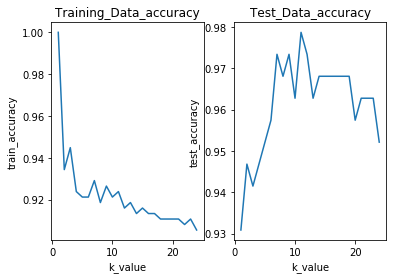

In [39]:
plt.subplot(121)
plt.plot(k , train_accuracy)
plt.title("Training_Data_accuracy")
plt.xlabel('k_value')
plt.ylabel('train_accuracy')
#plt.show()
plt.subplot(122)
plt.plot(k , test_accuracy)
plt.title("Test_Data_accuracy")
plt.xlabel('k_value')
plt.ylabel('test_accuracy')
plt.show()



In [40]:
k_value = np.where(test_accuracy == max(test_accuracy))

In [41]:
k_value

(array([10], dtype=int64),)

In [42]:
k[k_value]

array([11])

In [43]:
## perfect k_value is 11

In [44]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix


In [45]:
knn = KNeighborsClassifier(n_neighbors=11)


In [46]:
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=11)

In [47]:
y_train_pred = knn.predict(X_train)

In [48]:
accuracy_score(y_train , y_train_pred) # for training data

0.9238845144356955

In [49]:
y_test_pred = knn.predict(X_test)

In [50]:
accuracy_score(y_test , y_test_pred) # for test accuracy

0.9787234042553191

In [51]:
confusion_matrix(y_train , y_train_pred) # for training part

array([[229,   7],
       [ 22, 123]], dtype=int64)

In [52]:
confusion_matrix(y_test , y_test_pred) # for test part

array([[120,   1],
       [  3,  64]], dtype=int64)

In [55]:
print(classification_report(y_train , y_train_pred)) # training part

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       236
           1       0.95      0.85      0.89       145

    accuracy                           0.92       381
   macro avg       0.93      0.91      0.92       381
weighted avg       0.93      0.92      0.92       381



In [56]:
print(classification_report(y_test , y_test_pred)) # test part

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       121
           1       0.98      0.96      0.97        67

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



## 3rd_technique for finding k_value

In [57]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [58]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
accuracy = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn , X , y , cv = 10)
    accuracy.append(score.mean())

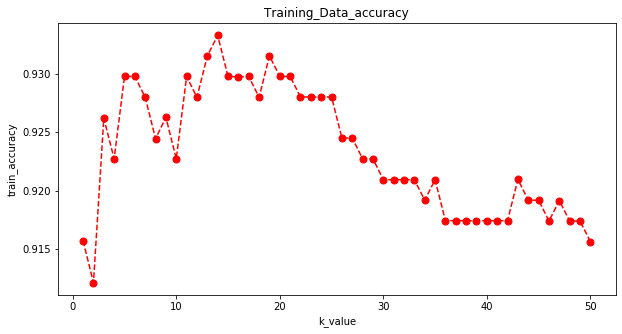

In [65]:
plt.figure(figsize = (10, 5))
plt.plot(range(1,51), accuracy , color = 'red' , marker = 'o' , linestyle='dashed' , markersize=7)
plt.title("Training_Data_accuracy")
plt.xlabel('k_value')
plt.ylabel('train_accuracy')
plt.show()


In [68]:
error = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn , X , y , cv = 10)
    error.append(1 - score.mean())

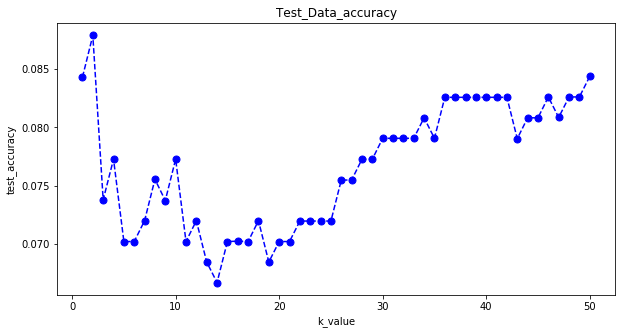

In [69]:
plt.figure(figsize = (10, 5))
plt.plot(range(1,51), error , color = 'b' , marker = 'o' , linestyle='dashed' , markersize=7)
plt.title("Test_Data_accuracy")
plt.xlabel('k_value')
plt.ylabel('test_accuracy')
plt.show()

## Naive_bayes

In [70]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
172,15.46,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.07069,...,18.79,17.04,125.00,1102.0,0.15310,0.3583,0.5830,0.18270,0.3216,0.10100
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.1936,0.1838,0.05601,0.2488,0.08151
56,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,...,26.14,28.14,170.10,2145.0,0.16240,0.3511,0.3879,0.20910,0.3537,0.08294
497,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,14.06,24.34,92.82,607.3,0.12760,0.2506,0.2028,0.10530,0.3035,0.07661
301,12.46,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,0.06249,...,13.46,23.07,88.13,551.3,0.10500,0.2158,0.1904,0.07625,0.2685,0.07764


In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
reg = GaussianNB()

In [73]:
reg.fit(X_train, y_train)

GaussianNB()

In [74]:
reg.score(X_train , y_train)

0.9396325459317585

In [75]:
reg.score(X_test , y_test)

0.9414893617021277